In [2]:
%matplotlib ipympl

<h1>Lab 1</h1>
<h3>Noah Bowen</h3>
<h3>10/17/2024</h3>

<h2>Introduction</h2>
<p>This document is the lab report for Noah Bowen about lab 1 which covers regression and regularization</p>

<h2>Part 1</h2>

<h3>Question 2</h3>

<p>Together, the R squared values do not explain 94.4% of the variation of Sales because they are partially redundant (some people who watch TV also listen to the radio), so those variables are at least slightly correlated with each other. This would only be the case if the two variables were entirely independent of each other and nobody who watched TV also listened to the radio.</p>

<h3>Question 3</h3>

<p>The answer for this is the same as my answer for question 2. In addition, we can see in the plot that as TV spending increases, Radio spending starts to have a larger effect, this shows that the two variables are partially correlated and therefore partially redundant</p>

<h2>Part 2</h2>
<h3>Question 2</h3>

In [1]:
# Step 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

dataset = pd.read_csv("allgreens.csv")
X = dataset.X4
y = dataset.X1
np.corrcoef(X,y)

array([[1.        , 0.91402407],
       [0.91402407, 1.        ]])

<p>The correlation coefficient is 0.91402407</p>

<h3>Question 3</h3>

In [4]:
X = dataset.X6
y = dataset.X1
np.corrcoef(X,y)

array([[ 1.        , -0.91223639],
       [-0.91223639,  1.        ]])

<p>The correlation coefficient is -0.91223639</p>

<h3>Question 4 and 5</h3>

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     611.6
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.40e-22
Time:                        16:25:31   Log-Likelihood:                -112.43
No. Observations:                  27   AIC:                             236.9
Df Residuals:                      21   BIC:                             244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8594     30.150     -0.626      0.5

C:\Users\bedo1\AppData\Local\Temp\ipykernel_7600\4149040916.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_axis = (lr_model.params[0]) + (lr_model.params[1]) * (x_axis) + (lr_model.params[5]) * (y_axis)


Text(0.5, 0, 'Sales')

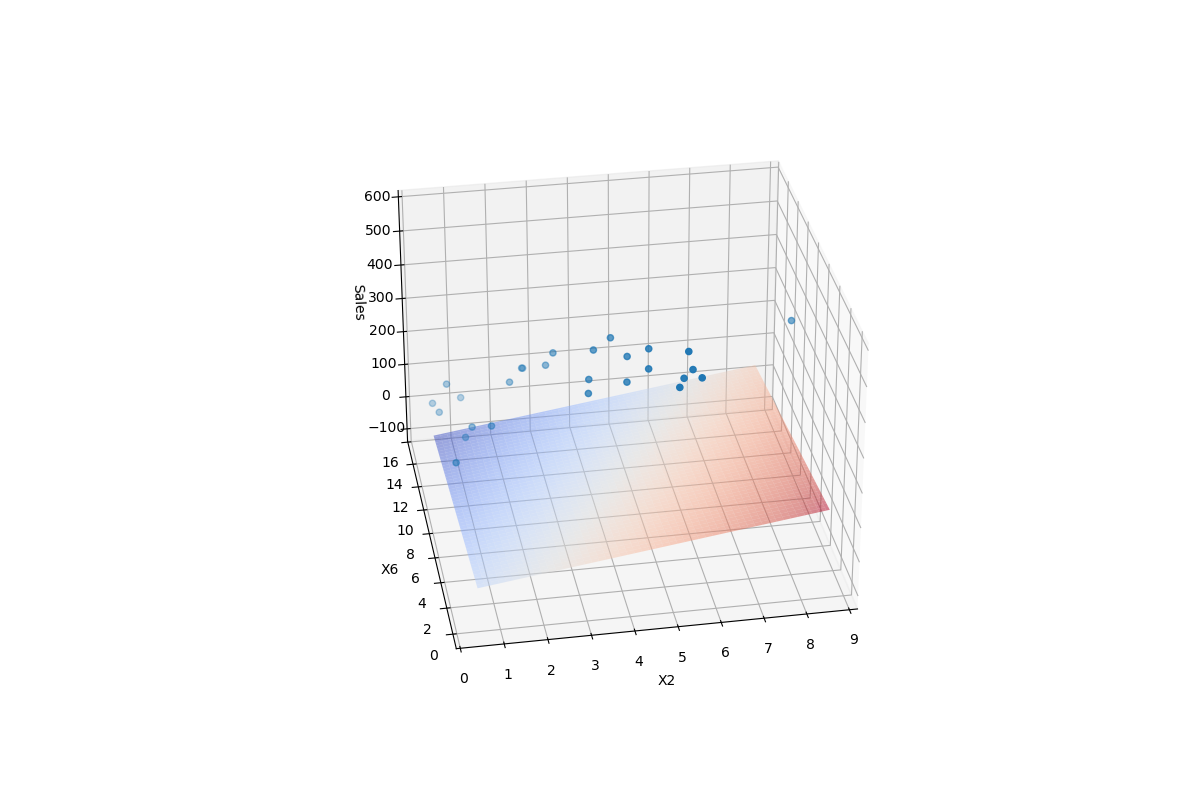

In [5]:
X = dataset[["X2","X3","X4","X5","X6"]]
X = sm.add_constant(X)
y = dataset.X1
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

from mpl_toolkits.mplot3d import Axes3D

# Use the ranges of values in the 'TV' and 'Radio' variables to work out the first two axes for the 3D plot.
x_axis, y_axis = np.meshgrid(np.linspace(dataset.X2.min(), dataset.X2.max(), 100), np.linspace(dataset.X6.min(), dataset.X6.max(), 100))

z_axis = (lr_model.params[0]) + (lr_model.params[1]) * (x_axis) + (lr_model.params[5]) * (y_axis)

# Generate 3D axes.
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection='3d', azim=-100)

# finally the plotting
ax.plot_surface(x_axis, y_axis, z_axis, cmap = plt.cm.coolwarm, alpha = 0.5, linewidth = 0)
ax.scatter(X.X2, X.X6, y)
ax.set_xlabel("X2")
ax.set_ylabel("X6")
ax.set_zlabel("Sales")

<p>These results tell us that the variables account for 99.3% of the variation in the dataset, meaning the model is highly accurate when looking at the training data</p>
<h3>Question 6</h3>
<p>I would argue that regularization would probably help with the response to new data because all but one of the variables have a large effect on the outcome meaning the model is highly specific (though it is hard to tell until tested on new data)</p>

<h3>Question 7</h3>
<p>I chose the lasso regularization model</p>

const   -18.387688
X2       16.191104
X3        0.174930
X4       11.501812
X5       13.564926
X6       -5.336568
dtype: float64
0.9931794163026052


C:\Users\bedo1\AppData\Local\Temp\ipykernel_7600\389274794.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z_axis = (lr_model.params[0]) + (lr_model.params[1]) * (x_axis) + (lr_model.params[5]) * (y_axis)


Text(0.5, 0, 'Sales')

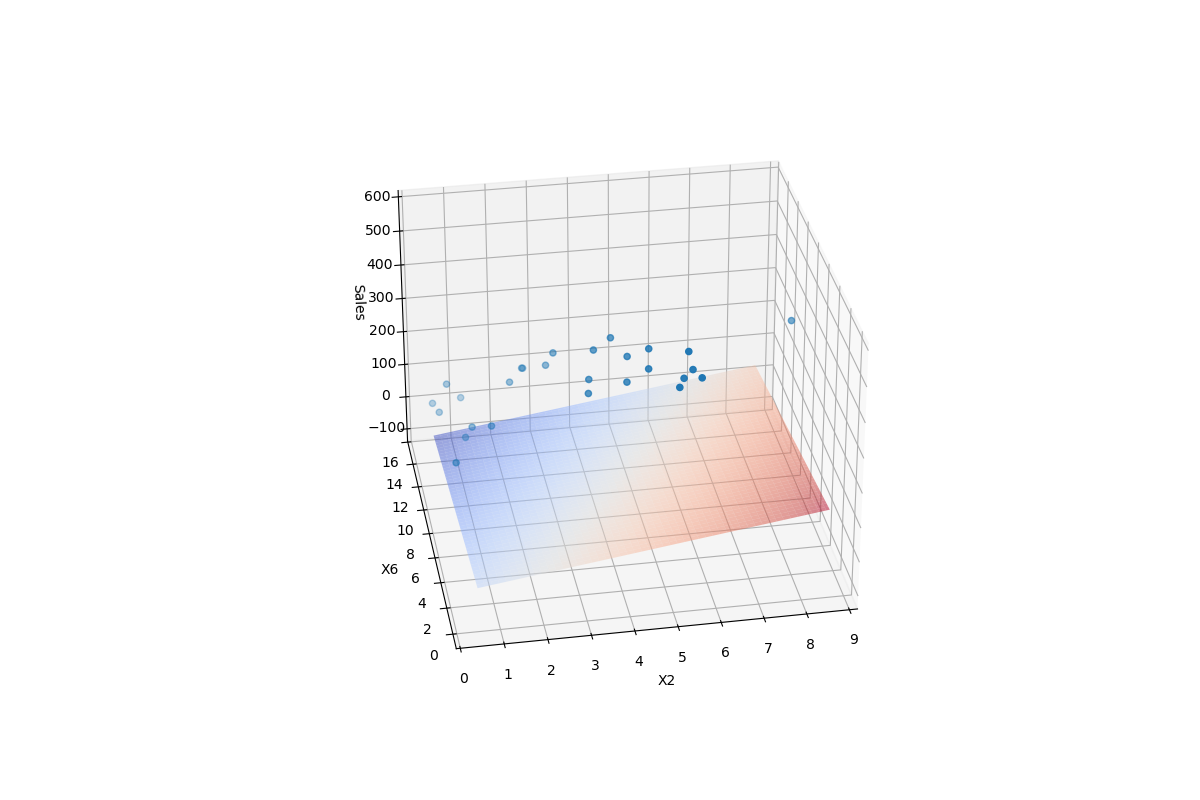

In [6]:
import cvxopt
lr_model = sm.OLS(y,X).fit_regularized(method='sqrt_lasso',alpha=0.01, L1_wt=1,start_params=None,profile_scale=False,refit=False)
print(lr_model.params)
from sklearn.metrics import r2_score
print(r2_score(y,lr_model.predict(X)))
from mpl_toolkits.mplot3d import Axes3D

# Use the ranges of values in the 'TV' and 'Radio' variables to work out the first two axes for the 3D plot.
x_axis, y_axis = np.meshgrid(np.linspace(dataset.X2.min(), dataset.X2.max(), 100), np.linspace(dataset.X6.min(), dataset.X6.max(), 100))

z_axis = (lr_model.params[0]) + (lr_model.params[1]) * (x_axis) + (lr_model.params[5]) * (y_axis)

# Generate 3D axes.
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection='3d', azim=-100)

# finally the plotting
ax.plot_surface(x_axis, y_axis, z_axis, cmap = plt.cm.coolwarm, alpha = 0.5, linewidth = 0)
ax.scatter(X.X2, X.X6, y)
ax.set_xlabel("X2")
ax.set_ylabel("X6")
ax.set_zlabel("Sales")

<p>The variables which the Lasso regularization prioritized fit the training data better and the other coefficients were decreased by a lot</p>

<h2>Part 3</h2>
<h3>Question 10</h3>
<p>I believe the response variable is median house value</p>
<h3>Question 11</h3>
<p>I chose the predictors to be housing median age, total bedrooms, and median income. The reason I chose these predictors is because the age of a house and total bedrooms is often taken into account when valueing a home, and those with higher income are more liekly to purchase more expensive homes</p>

<h3>Question 12: Correlation Coefficients</h3>

In [2]:
dataset_housing = pd.read_csv("california_housing_train.csv")
dataset_housing.head()
housing_median_age = np.array(dataset_housing.housing_median_age)
total_bedrooms = np.array(dataset_housing.total_bedrooms)
median_income = np.array(dataset_housing.median_income)
median_house_value = np.array(dataset_housing.median_house_value)

#print("Correlation Coefficients:")
print("\tHousing Median Age: " + str(np.corrcoef(housing_median_age,median_house_value)[0][1]))
print("\tTotal Bedrooms: " + str(np.corrcoef(total_bedrooms,median_house_value)[0][1]))
print("\tMedian Income: " + str(np.corrcoef(median_income,median_house_value)[0][1]))

	Housing Median Age: 0.10675770707287635
	Total Bedrooms: 0.04578305197954591
	Median Income: 0.6918706037806694


<h3>Question 12a</h3>

In [15]:
median_income = sm.add_constant(median_income)
lr_model = sm.OLS(median_house_value,median_income).fit()
print(lr_model.summary())
lr_model_reg = sm.OLS(median_house_value,median_income).fit_regularized(method='elastic_net',alpha=0.3, L1_wt=0,start_params=None,profile_scale=False,refit=False)
print("Regularized Weights: " + str(lr_model_reg.params))
import cvxopt
from sklearn.metrics import r2_score
print("Regularized R^2 Score: " + str(r2_score(median_house_value,lr_model_reg.predict(median_income))))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:53:45   Log-Likelihood:            -2.1683e+05
No. Observations:               17000   AIC:                         4.337e+05
Df Residuals:                   16998   BIC:                         4.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.398e+04   1456.540     30.195      0.0

<h3>Question 12b</h3>

In [13]:
housing_median_age = sm.add_constant(housing_median_age)
lr_model = sm.OLS(median_house_value,housing_median_age).fit()
print(lr_model.summary())
lr_model_reg = sm.OLS(median_house_value,housing_median_age).fit_regularized(method='elastic_net',alpha=0.3, L1_wt=0,start_params=None,profile_scale=False,refit=False)
print("Regularized Weights: " + str(lr_model_reg.params))
import cvxopt
from sklearn.metrics import r2_score
print("Regularized R^2 Score: " + str(r2_score(median_house_value,lr_model_reg.predict(housing_median_age))))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.80e-44
Time:                        18:53:32   Log-Likelihood:            -2.2226e+05
No. Observations:               17000   AIC:                         4.445e+05
Df Residuals:                   16998   BIC:                         4.445e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.792e+05   2195.146     81.624      0.0

<h3>Question 12c</h3>

In [11]:
X = np.array(dataset_housing[["housing_median_age","median_income"]])
X = sm.add_constant(X)
y = median_house_value

lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
lr_model_reg = sm.OLS(y,X).fit_regularized(method='elastic_net',alpha=0.3, L1_wt=0,start_params=None,profile_scale=False,refit=False)
print("Regularized Weights: " + str(lr_model_reg.params))
import cvxopt
from sklearn.metrics import r2_score
print("Regularized R^2 Score: " + str(r2_score(y,lr_model_reg.predict(X))))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     8992.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:53:15   Log-Likelihood:            -2.1623e+05
No. Observations:               17000   AIC:                         4.325e+05
Df Residuals:                   16997   BIC:                         4.325e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.113e+04   2104.248     -5.290      0.0

<h3>Question 12d</h3>

In [20]:
X = np.array(dataset_housing[["housing_median_age","median_income","total_bedrooms"]])
X = sm.add_constant(X)
y = median_house_value

lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())
lr_model_reg = sm.OLS(y,X).fit_regularized(method='elastic_net',alpha=0.3, L1_wt=0,start_params=None,profile_scale=False,refit=False)
print("Regularized Weights: " + str(lr_model_reg.params))
import cvxopt
from sklearn.metrics import r2_score
print("Regularized R^2 Score: " + str(r2_score(y,lr_model_reg.predict(X))))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     6368.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:55:56   Log-Likelihood:            -2.1596e+05
No. Observations:               17000   AIC:                         4.319e+05
Df Residuals:                   16996   BIC:                         4.320e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.313e+04   2484.431    -17.361      0.0

<h3>Question 13a</h3>
<p>There was very little difference at low alpha values, only when increasing alpha by quite a bit was I able to change the weights greatly through regularization, lasso regularization seems like it would work better in this case because two of the predictors have very little effect on the output according to R^2 scores and correlation coefficients. Throughout all three cases the ridge regularization decreased weights by a similar amount.</p>
<h3>Question 13b</h3>
<p>The R^2 value tells us how well a prediction model predicts the values of the data points given to it. In the cases where the R^2 value is negative it tells us that a flat line would be a better predictor so in these cases it seems the ridge regularization was unnecessary because the variables were already correlated so little that performing ridge regularization actively made the model even more terrible at predicting the output.</p>

<h2>Conclusion</h2>
<p>In conclusion the ridge regularization seems to have made little difference in these cases, the lasso regularization seems to work much better because it seems like only a few variables are actually making a large impact on the output.</p>